<h4>In this competition your task will be to predict the mean math exam result (from 0 to 100 points) for students of tutors in test.csv. <p><p>You will be given two datasets: train.csv (contains all features and the target) and test.csv (only features).</p></p></h4>
<a href=https://www.kaggle.com/c/gb-regression-tutors-expected-math-exam-results title='Ссылка на задание по проекту'>Competition page</a><p><h4>Rules</h4></p><p>You can only use these imports:</p>
<em><ol><li>import numpy as np</li>
<li>import pandas as pd</li>
<li>from sklearn.model_selection import train_test_split</li>
<li>import matplotlib.pyplot as plt</li>
<li>import seaborn as sns</li></ol></em>

<h4>Preface</h4>
<p>The notebook consistis of 2 phases:</p>
<ol><li>Data analysis - the phase, which we use to take a closer look at the data and understand if any data manipulation actions are required</li>
    <li>Model selection - the phase includes creation and model training as well as model prediction</li>
</ol>
    

<p>Second phase contains 2 models, which were tested in order to find the best one.
<ol>
    <li>Gradient boosting</li>
    <li>Random forest</li>
    </ol>
    </p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<h4>1. Data analisys</h4>

In [2]:
#Let's first import data and create datasets

In [3]:
import os,zipfile,re

In [4]:
#the function, which creates the dictionary of dataframes from csv files
def create_dataframes(current_path):
    files_for_dataframes=[]
    files=os.listdir(current_path)
    dict_of_dataframes={}
    for file in files:
         if re.findall('\.csv',file):
                files_for_dataframes.append(file)
    for element in enumerate(files_for_dataframes,1):
        key_=re.findall('(\w*)\.',element[1])[0]
        dict_of_dataframes[key_]=pd.read_csv(os.path.join(current_path,element[1]))
    return dict_of_dataframes

In [5]:
#the function, which unzips in case there is anything to unzip, otherwise the function simply calls other function
def un_zip(current_path):
    if os.path.isdir(current_path):
        list_to_unzip=os.listdir(current_path)
        for element in list_to_unzip:
            if re.findall('\.zip',element):
                full_path=os.path.join(current_path,element)
                file=zipfile.ZipFile(full_path)
                file.extractall(current_path)
        return create_dataframes(current_path)

In [6]:
#current_path - the path, where files or an archive is situated
current_path=r'C:\Users\pc\Desktop\Geekbrains\Курс. Алгоритмы анализа данных\Курс от 27.11.20\Курсовой проект\Регрессия'

In [7]:
dict_of_dataframes=un_zip(current_path)

In [8]:
dict_of_dataframes

{'sample_submission':          Id  mean_exam_points
 0     10000              50.0
 1     10001              50.0
 2     10002              50.0
 3     10003              50.0
 4     10004              50.0
 ...     ...               ...
 9995  19995              50.0
 9996  19996              50.0
 9997  19997              50.0
 9998  19998              50.0
 9999  19999              50.0
 
 [10000 rows x 2 columns],
 'test':          Id   age  years_of_experience  lesson_price  qualification  physics  \
 0     10000  46.0                  3.0        1050.0            1.0      0.0   
 1     10001  43.0                  3.0        1850.0            2.0      0.0   
 2     10002  52.0                  1.0        1550.0            1.0      1.0   
 3     10003  57.0                  6.0        2900.0            3.0      1.0   
 4     10004  44.0                  4.0        3150.0            3.0      1.0   
 ...     ...   ...                  ...           ...            ...      ...   
 99

In [9]:
train_data=dict_of_dataframes['train'].copy()

In [10]:
test_data=dict_of_dataframes['test'].copy()

In [11]:
sample_submission=dict_of_dataframes['sample_submission'].copy()

1.2. Let's take a closer look at the data

In [12]:
train_data.info()
#well, there are no null-value features and all of the presented features except of the 'Id' has the same data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [13]:
train_data.describe()
#we see that the data is quite clean: there are no unrealistic values in terms of age, years of experience, lesson prices

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


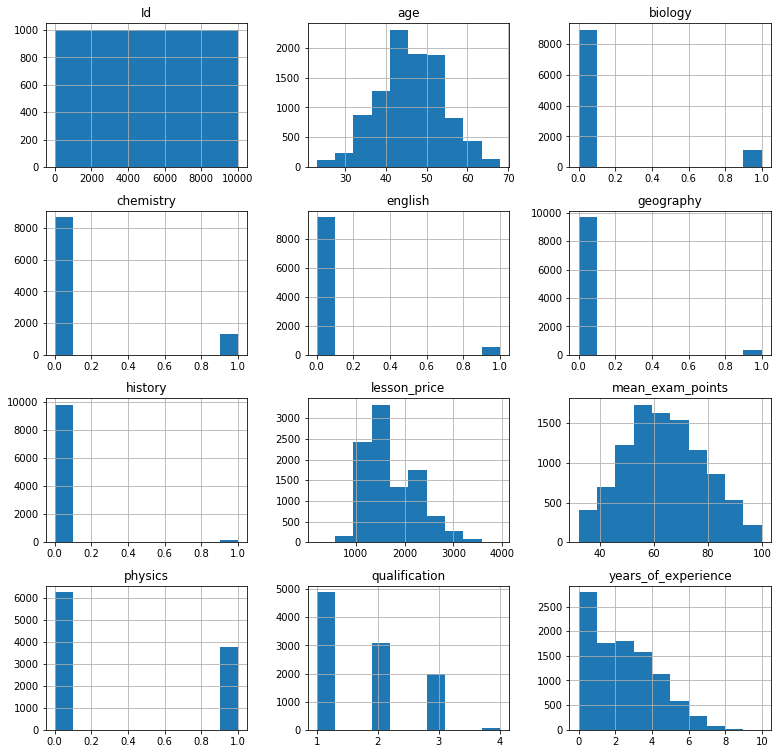

In [14]:
train_data.hist(figsize=(13,13))
plt.show()
#histograms show the following: 1.features which represent subjects, like biology, chemistry etc has boolen values, 
#it is well noticed from both hists as well as data description
#for other features like age, years of experience etc there are no outliers

In [15]:
train_data.corr()
#we see here that, there are indeed features, that have nothing to do with
#mean_exam_points for math, at least there is no linear link: all of the subjects except of physics, which we may leave, though the correlation is weak. We may also drop age for the same reason

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,1.000000,-0.004596,0.007408,-0.004433,-0.005077,-0.010570,0.002694,-0.000016,0.017723,-0.014869,-0.004482,0.004235
age,-0.004596,1.000000,0.059947,-0.005462,-0.000976,0.004045,0.001250,-0.005026,-0.012546,0.013130,0.010606,-0.007144
years_of_experience,0.007408,0.059947,1.000000,0.248311,0.194097,0.008451,0.004246,-0.001722,-0.010241,-0.011129,0.018640,0.184599
lesson_price,-0.004433,-0.005462,0.248311,1.000000,0.790087,-0.006432,0.005130,-0.004860,-0.012018,0.010525,-0.001142,0.664061
qualification,-0.005077,-0.000976,0.194097,0.790087,1.000000,0.007529,-0.002683,-0.007504,-0.008047,0.003610,-0.005109,0.698261
physics,-0.010570,0.004045,0.008451,-0.006432,0.007529,1.000000,0.019852,0.000661,0.004238,0.001904,0.004867,0.169535
chemistry,0.002694,0.001250,0.004246,0.005130,-0.002683,0.019852,1.000000,0.007866,0.009974,-0.004447,-0.008079,0.010640
biology,-0.000016,-0.005026,-0.001722,-0.004860,-0.007504,0.000661,0.007866,1.000000,0.010146,-0.013042,0.010995,0.026535
english,0.017723,-0.012546,-0.010241,-0.012018,-0.008047,0.004238,0.009974,0.010146,1.000000,-0.008148,-0.004560,0.007755
geography,-0.014869,0.013130,-0.011129,0.010525,0.003610,0.001904,-0.004447,-0.013042,-0.008148,1.000000,-0.005049,0.013323


In [16]:
#Let's separate labels into other dataset
train_data_labels=train_data[['Id','mean_exam_points']]

In [17]:
#Let's drop features in train dataset which due to the reasons mentioned above will not иу used in our models
train_data_clear_features=train_data[['Id','years_of_experience','lesson_price','qualification','physics']]

In [18]:
#Let's drop features in test dataset which due the reasons mentioned above will not be used in our models
test_data_clear_features=test_data[['Id','years_of_experience','lesson_price','qualification','physics']]

<h4>2. Model selection</h4>

<h4>1. Gradient boosting</h4>


In [19]:
X_train,X_validation,y_train,y_validation=train_test_split(train_data_clear_features,train_data_labels,test_size=0.25,random_state=42)

In [20]:
X_train.shape,X_validation.shape,y_train.shape,y_validation.shape

((7500, 5), (2500, 5), (7500, 2), (2500, 2))

In [65]:
#let's create class node
class Node_for_gb():
    def __init__(self,true_branch,false_branch,index,t_value):
        self.true_branch=true_branch
        self.false_branch=false_branch
        self.index=index
        self.t_value=t_value

In [66]:
#Let's create class leaf
class Leaf_for_gb():
    def __init__(self,dataset,labels):
        self.dataset=dataset
        self.labels=labels
        self.prediction=self.predict()
        
    def predict(self):
        predictions=np.mean(self.labels)
        return predictions

In [67]:
#Using gini createria
def gini_for_gb(labels):
    labels_average=np.mean(labels)
    impurity=np.mean(((labels-labels_average)**2))
    
    return impurity

In [68]:
#Counting information gain
def qty_gain_for_gb(root,true_branch_labels,false_branch_labels):
    p=true_branch_labels.shape[0]/(true_branch_labels.shape[0]+false_branch_labels.shape[0])
    return root - p * gini_for_gb(true_branch_labels) - (1 - p) * gini_for_gb(false_branch_labels)

In [69]:
#Spliting data and labels into two branches
def split_for_gb(dataset,labels,index,t_value):

    true_branch_index=np.where(dataset[:,index]<=t_value)
    false_branch_index=np.where(dataset[:,index]>t_value)
    
    true_branch_dataset=dataset[true_branch_index]
    false_branch_dataset=dataset[false_branch_index]
    
    true_branch_labels=labels[true_branch_index]
    false_branch_labels=labels[false_branch_index]
    
    return true_branch_dataset,false_branch_dataset,true_branch_labels,false_branch_labels

In [70]:
#Function, which returns the best split in term of information gain
def find_best_split_for_gb(dataset,labels):
    best_index=None
    best_t_value=None
    min_leaf_objects=5
    root=gini_for_gb(labels)

    
    best_gain=0
    
    for index in range(dataset.shape[1]):
        t_values=np.unique(dataset[:,index])
        
        for t_value in t_values:
            true_branch_dataset,false_branch_dataset,true_branch_labels,false_branch_labels=split_for_gb(dataset,labels,index,t_value)
            
            if len(true_branch_labels)<min_leaf_objects or len(false_branch_labels)<min_leaf_objects:
                continue
            
            current_gain=qty_gain_for_gb(root,true_branch_labels,false_branch_labels)
            
            
            if current_gain>best_gain:
                best_gain,best_index,best_t_value=current_gain,index,t_value
    
    return best_gain,best_index,best_t_value

In [71]:
#Building the tree
def build_tree_for_gb(dataset,labels,max_depth=False):
    
    
    best_qty,best_index,best_t_value=find_best_split_for_gb(dataset,labels)
    
    if best_qty==0 or max_depth==0: 
        return Leaf_for_gb(dataset,labels)



    true_branch_dataset,false_branch_dataset,true_branch_labels,false_branch_labels=split_for_gb(dataset,labels,best_index,best_t_value)

    true_branch=build_tree_for_gb(true_branch_dataset,true_branch_labels,max_depth-1)
    false_branch=build_tree_for_gb(false_branch_dataset,false_branch_labels,max_depth-1)

    return Node_for_gb(true_branch,false_branch,best_index,best_t_value)

In [72]:
def predict_object_for_gb(obj,node):
    
    if isinstance(node,Leaf_for_gb):
        return node.prediction
    
    if obj[node.index]<=node.t_value:
        return predict_object_for_gb(obj,node.true_branch)
    else:
        return predict_object_for_gb(obj,node.false_branch)

In [73]:
#Function for creating predictions for each tree
def predict_for_gb(dataset,tree):
    predictions=[]
    for numerical in range(dataset.shape[0]):
        result=predict_object_for_gb(dataset[numerical],tree)
        predictions.append(result)
    return predictions

In [30]:
#We will use MSE for internal purpose to perceive the way the error behaves
def MSE_for_gb(target_labels,predicted_labels):
    return np.sum((predicted_labels-target_labels)**2)/len(target_labels)

In [31]:
#Model validation metric, which is stated by the task
def coefficient_of_determination(y,y_predicted):
    ss_tot=np.sum((y-y.mean())**2)
    ss_res=np.sum((y-y_predicted)**2)
    return 1-(ss_res/ss_tot)

In [32]:
#Calculating residuals
def gb_residual(target_labels,predicted_labels):
    return -(predicted_labels-target_labels)

In [33]:
#Calculating predictions of the whole model
def gb_predict(dataset,tree_list,eta):
    predictions=np.zeros([dataset.shape[0],1])

    for tree in tree_list:
        predictions=predictions+eta*np.reshape(np.array(predict_for_gb(dataset,tree)),(-1,1))
        
    return predictions

In [34]:
#The function, which launches functions responsible for training
def gb_fit(number_of_trees,max_depth,X_train,y_train,eta):
    tree_list=[]
    MSE_train=[]
    MSE_train_dict={}

    

    tree_dict={}
    
    
    for i in range(number_of_trees):
             
        predictions_train=gb_predict(X_train,tree_list,eta)
        error_train=MSE_for_gb(y_train,predictions_train)
        MSE_train.append(error_train)
        residual=gb_residual(y_train,predictions_train)
        
        tree=build_tree_for_gb(X_train,residual,max_depth=max_depth)

        
        tree_list.append(tree)


        
    
    return tree_list

In [35]:
#Function, which receives various parameters for the function training
def parameters_selection(X_train,y_train,eta,number_of_trees_list,max_depth_list):
    result_list=[]
    for t in number_of_trees_list:
        for d in max_depth_list:
            result={}
            result['trees']=t
            result['depth']=d
            result['values']=gb_fit(t,d,X_train,y_train,eta)
            result_list.append(result)
    
    return result_list

In [36]:
#Let's teach the model
gb_trained=parameters_selection(X_train.loc[:,X_train.columns!='Id'].values,y_train.loc[:,y_train.columns!='Id'].values,0.2,[50],[10])

In [37]:
#Predictions on the training set
gb_predictions_train=gb_predict(X_train.loc[:,X_train.columns!='Id'].values,gb_trained[0]['values'],0.2)

In [38]:
#Coeff of determination on the training set
cod_train=coefficient_of_determination(y_train.loc[:,y_train.columns!='Id'].values,gb_predictions_train)
cod_train

0.7131597768638143

In [39]:
#Predictions on the validation set
gb_predictions_validation=gb_predict(X_validation.loc[:,X_train.columns!='Id'].values,gb_trained[0]['values'],0.2)

In [40]:
#Coeff of determination on the validation set
cod_validation=coefficient_of_determination(y_validation.loc[:,y_validation.columns!='Id'].values,gb_predictions_validation)
cod_validation

0.6226083959421759

In [41]:
#Predictions on the test set
gb_predictions_test=gb_predict(test_data_clear_features.loc[:,test_data_clear_features.columns!='Id'].values,gb_trained[0]['values'],0.2)

In [42]:
gb_predictions_test_rounded=np.around(gb_predictions_test,0)

In [48]:
df_test=pd.DataFrame(gb_predictions_test_rounded,columns=['mean_exam_points'])

In [50]:
results=pd.concat([test_data_clear_features,df_test],axis=1)[['Id','mean_exam_points']]

In [51]:
results

,Id,mean_exam_points
0,10000,54.0
1,10001,60.0
2,10002,48.0
3,10003,85.0
4,10004,91.0
...,...,...
9995,19995,41.0
9996,19996,77.0
9997,19997,49.0
9998,19998,66.0


In [52]:
#This is the final result for gb_model:
results.to_csv('results_v1.csv',index=False)

_____________________________________________________

<h4>2. Random Forest</h4>

<p>Despite the fact that the gradient boosting shows better results on train, random forest performs better on validation, which means that it can better generalise. 
Due to the best results on validation data, random forest predictions on test were submitted</p>

In [19]:
#Since it is unknown which model will be launched first, as well as to mitigate risks of dependencies, Decision Tree creation functions are duplicated

In [20]:
X_train,X_validation,y_train,y_validation=train_test_split(train_data_clear_features,train_data_labels,test_size=0.25,random_state=42)

In [21]:
#Since the actions below in terms of the tree creation are similar to the gradient boosting model,
#they are not commented

In [22]:
import math

In [23]:
class Node():
    def __init__(self,true_branch,false_branch,index,t_value):
        self.true_branch=true_branch
        self.false_branch=false_branch
        self.index=index
        self.t_value=t_value

In [24]:
class Leaf():
    def __init__(self,dataset,labels):
        self.dataset=dataset
        self.labels=labels
        self.prediction=self.predict()
        
    def predict(self):
        predictions=np.mean(self.labels)
        return predictions

In [25]:
def gini(labels):
    labels_average=np.mean(labels)
    impurity=np.mean(((labels-labels_average)**2))
    
    return impurity

In [26]:
def qty_gain(root,true_branch_labels,false_branch_labels):
    p=true_branch_labels.shape[0]/(true_branch_labels.shape[0]+false_branch_labels.shape[0])
    return root - p * gini(true_branch_labels) - (1 - p) * gini(false_branch_labels)

In [27]:
def split(dataset,labels,index,t_value):

    true_branch_index=np.where(dataset[:,index]<=t_value)
    false_branch_index=np.where(dataset[:,index]>t_value)
    
    true_branch_dataset=dataset[true_branch_index]
    false_branch_dataset=dataset[false_branch_index]
    
    true_branch_labels=labels[true_branch_index]
    false_branch_labels=labels[false_branch_index]
    
    return true_branch_dataset,false_branch_dataset,true_branch_labels,false_branch_labels

In [28]:
#In comparison to the gradient boosting best split function, the current one uses the random subset of features on each node, to grow random forest
def find_best_split(dataset,labels):
    best_index=None
    best_t_value=None
    min_leaf_objects=5
    root=gini(labels)

    
    best_gain=0
    
    random_features=np.random.permutation(dataset.shape[1])[:math.ceil(dataset.shape[1]/3)]
    for index in random_features:
        t_values=np.unique(dataset[:,index])
        
        for t_value in t_values:
            true_branch_dataset,false_branch_dataset,true_branch_labels,false_branch_labels=split(dataset,labels,index,t_value)
            
            if len(true_branch_labels)<min_leaf_objects or len(false_branch_labels)<min_leaf_objects:
                continue
            
            current_gain=qty_gain(root,true_branch_labels,false_branch_labels)
            
            
            if current_gain>best_gain:
                best_gain,best_index,best_t_value=current_gain,index,t_value
    
    return best_gain,best_index,best_t_value

In [29]:
def build_tree(dataset,labels,max_depth):
    
    
    best_qty,best_index,best_t_value=find_best_split(dataset,labels)
    
    if best_qty==0 or max_depth==0: 
        return Leaf(dataset,labels)



    true_branch_dataset,false_branch_dataset,true_branch_labels,false_branch_labels=split(dataset,labels,best_index,best_t_value)

    true_branch=build_tree(true_branch_dataset,true_branch_labels,max_depth-1)
    false_branch=build_tree(false_branch_dataset,false_branch_labels,max_depth-1)

    return Node(true_branch,false_branch,best_index,best_t_value)

In [30]:
def predict_object(obj,node):
    
    if isinstance(node,Leaf):
        return node.prediction
    
    if obj[node.index]<=node.t_value:
        return predict_object(obj,node.true_branch)
    else:
        return predict_object(obj,node.false_branch)

In [31]:
def predict_updated(dataset,tree):
    predictions=[]
    for numerical in range(dataset.shape[0]):
        result=predict_object(dataset[numerical],tree)
        predictions.append(result)
    return predictions

In [32]:
def coefficient_of_determination(y,y_predicted):
    ss_tot=np.sum((y-y.mean())**2)
    ss_res=np.sum((y-y_predicted)**2)
    return 1-(ss_res/ss_tot)

In [33]:
#This function creates bootstrap datasets for each tree
def create_bootstrap_samples(dataset,labels,number_of_trees):
    list_of_data_bootstraps=[]
    list_of_labels_bootstraps=[]
    
    for t in range(number_of_trees):
        indexes=np.random.randint(0,dataset.shape[0],dataset.shape[0])
        
        new_array_dataset=[]
        new_array_labels=[]
        for index in indexes:
            new_array_dataset.append(dataset[index])
            new_array_labels.append(labels[index])
        new_array_dataset=np.array(new_array_dataset)
        new_array_labels=np.array(new_array_labels)
        
        list_of_data_bootstraps.append(new_array_dataset)
        list_of_labels_bootstraps.append(new_array_labels)
        
    return list_of_data_bootstraps,list_of_labels_bootstraps

In [34]:
#Function which launches the procedure of random forest creation
def build_random_forest(dataset,labels,number_of_trees,max_depth):
    list_of_data_bootstraps,list_of_labels_bootstraps=create_bootstrap_samples(dataset,labels,number_of_trees)
    
    
    forest=[]
    
    
    for t in range(number_of_trees):
        tree=build_tree(list_of_data_bootstraps[t],list_of_labels_bootstraps[t],max_depth=max_depth)
        forest.append(tree)
    

    return forest

In [35]:
#Function, which returns the result of random forest predictions
def random_forest_prediction(dataset,forest):
    
    predictions_list=[]
    
    for tree in forest:
        tree_predictions=predict_updated(dataset,tree)
        tree_predictions=np.reshape(tree_predictions,(-1,1))
        predictions_list.append(tree_predictions)
        
    return np.mean(predictions_list,axis=0)

In [36]:
#Let's train the model
forest_trained=build_random_forest(X_train.loc[:,X_train.columns!='Id'].values,y_train.loc[:,y_train.columns!='Id'].values,50,10)

In [37]:
#Predictions on the training set
forest_predictions_train=random_forest_prediction(X_train.loc[:,X_train.columns!='Id'].values,forest_trained)

In [38]:
#Coeff of determination on the training set
cod_train_forest=coefficient_of_determination(y_train.loc[:,y_train.columns!='Id'].values,forest_predictions_train)
cod_train_forest

0.6801076450024242

In [39]:
#Predictions on the validation set
forest_predictions_validation=random_forest_prediction(X_validation.loc[:,X_validation.columns!='Id'].values,forest_trained)

In [41]:
#Coeff of determination on the validation set
cod_validation_forest=coefficient_of_determination(y_validation.loc[:,y_validation.columns!='Id'].values,forest_predictions_validation)
cod_validation_forest

0.641009159234249

In [42]:
#Predictions on the test set
forest_predictions_test=random_forest_prediction(test_data_clear_features.loc[:,test_data_clear_features.columns!='Id'].values,forest_trained)

In [44]:
forest_predictions_test_rounded=np.around(forest_predictions_test,0)

In [45]:
df_forest_test=pd.DataFrame(forest_predictions_test_rounded,columns=['mean_exam_points'])

In [46]:
results_forest=pd.concat([test_data_clear_features,df_forest_test],axis=1)[['Id','mean_exam_points']]

In [48]:
#This is the final result:
results_forest.to_csv('results_forest_v2.csv',index=False)